In [13]:
from transformers import pipeline
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Calculate and display the confusion matrix.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # Metrics
import matplotlib.pyplot as plt # Data visualization.
import seaborn as sns

# Plot the confusion matrix of our results
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## For showing how long it takes
import time

In [3]:
embedding_model = pipeline('feature-extraction', model='distilbert-base-cased', truncation=True)


In [6]:
df = pd.read_csv('data/20-newsgroups.csv')
df.shape

(11314, 4)

In [7]:
df.topic_category.value_counts()

selected_topics = ['rec.sport.hockey', 'rec.sport.baseball' ,'sci.electronics',]

debug = True

if debug:
    if selected_topics:
        df = df[ df['topic_category'].isin(selected_topics)]
    df = df.sample(frac=.03, random_state=69)
    print(df.shape)

df.head()


(54, 4)


,id,message,topic,topic_category
7645,7645,Organization: University of Notre Dame - Offic...,10,rec.sport.hockey
10031,10031,From: rauser@fraser.sfu.ca (Richard John Rause...,10,rec.sport.hockey
9131,9131,From: savoy@hg.uleth.ca (Jim Savoy)\r\nSubject...,9,rec.sport.baseball
3249,3249,From: thf2@kimbark.uchicago.edu (Ted Frank)\r\...,9,rec.sport.baseball
6090,6090,From: wellison@kuhub.cc.ukans.edu\r\nSubject: ...,12,sci.electronics


In [8]:
docs = list(df['message'].values)
docs[:1]

list_of_docs = []

for doc in docs:
    list_of_docs.append(doc)

In [9]:
texts_embeddings = embedding_model(list_of_docs)

In [10]:
embeddings = []
for item in texts_embeddings:
    embeddings.append(item[0][0])
print(len(embeddings[0]))




768


In [33]:
# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [14]:
X = embeddings
y = df['topic_category'].values

print(len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


54 54


In [15]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
# clf.score()
y_pred = clf.predict(X_test)

clf.score(X_test, y_test)

0.8181818181818182

Text(70.72222222222221, 0.5, 'Actual')

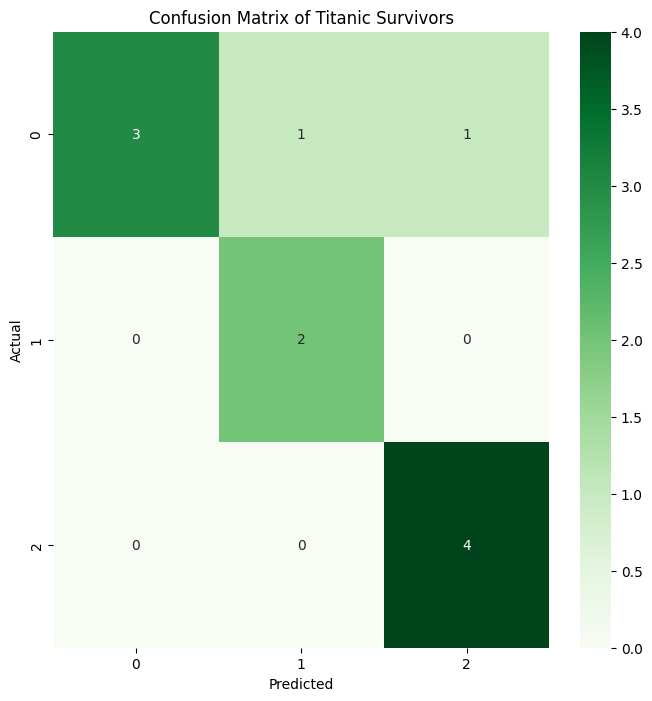

In [17]:
# Calculate and display the confusion matrix.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # Metrics
import matplotlib.pyplot as plt # Data visualization.
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)

# tn, fp, fn, tp = cm.ravel()

fig = plt.figure(figsize=(8, 8))
ax = sns.heatmap(cm, annot=True, cmap="Greens", fmt="g", )

plt.title("Confusion Matrix of Titanic Survivors")
plt.xlabel("Predicted")
plt.ylabel("Actual")

(array([0, 1, 2]),
 [Text(0, 0, 'rec.sport.baseball'),
  Text(1, 0, 'rec.sport.hockey'),
  Text(2, 0, 'sci.electronics')])

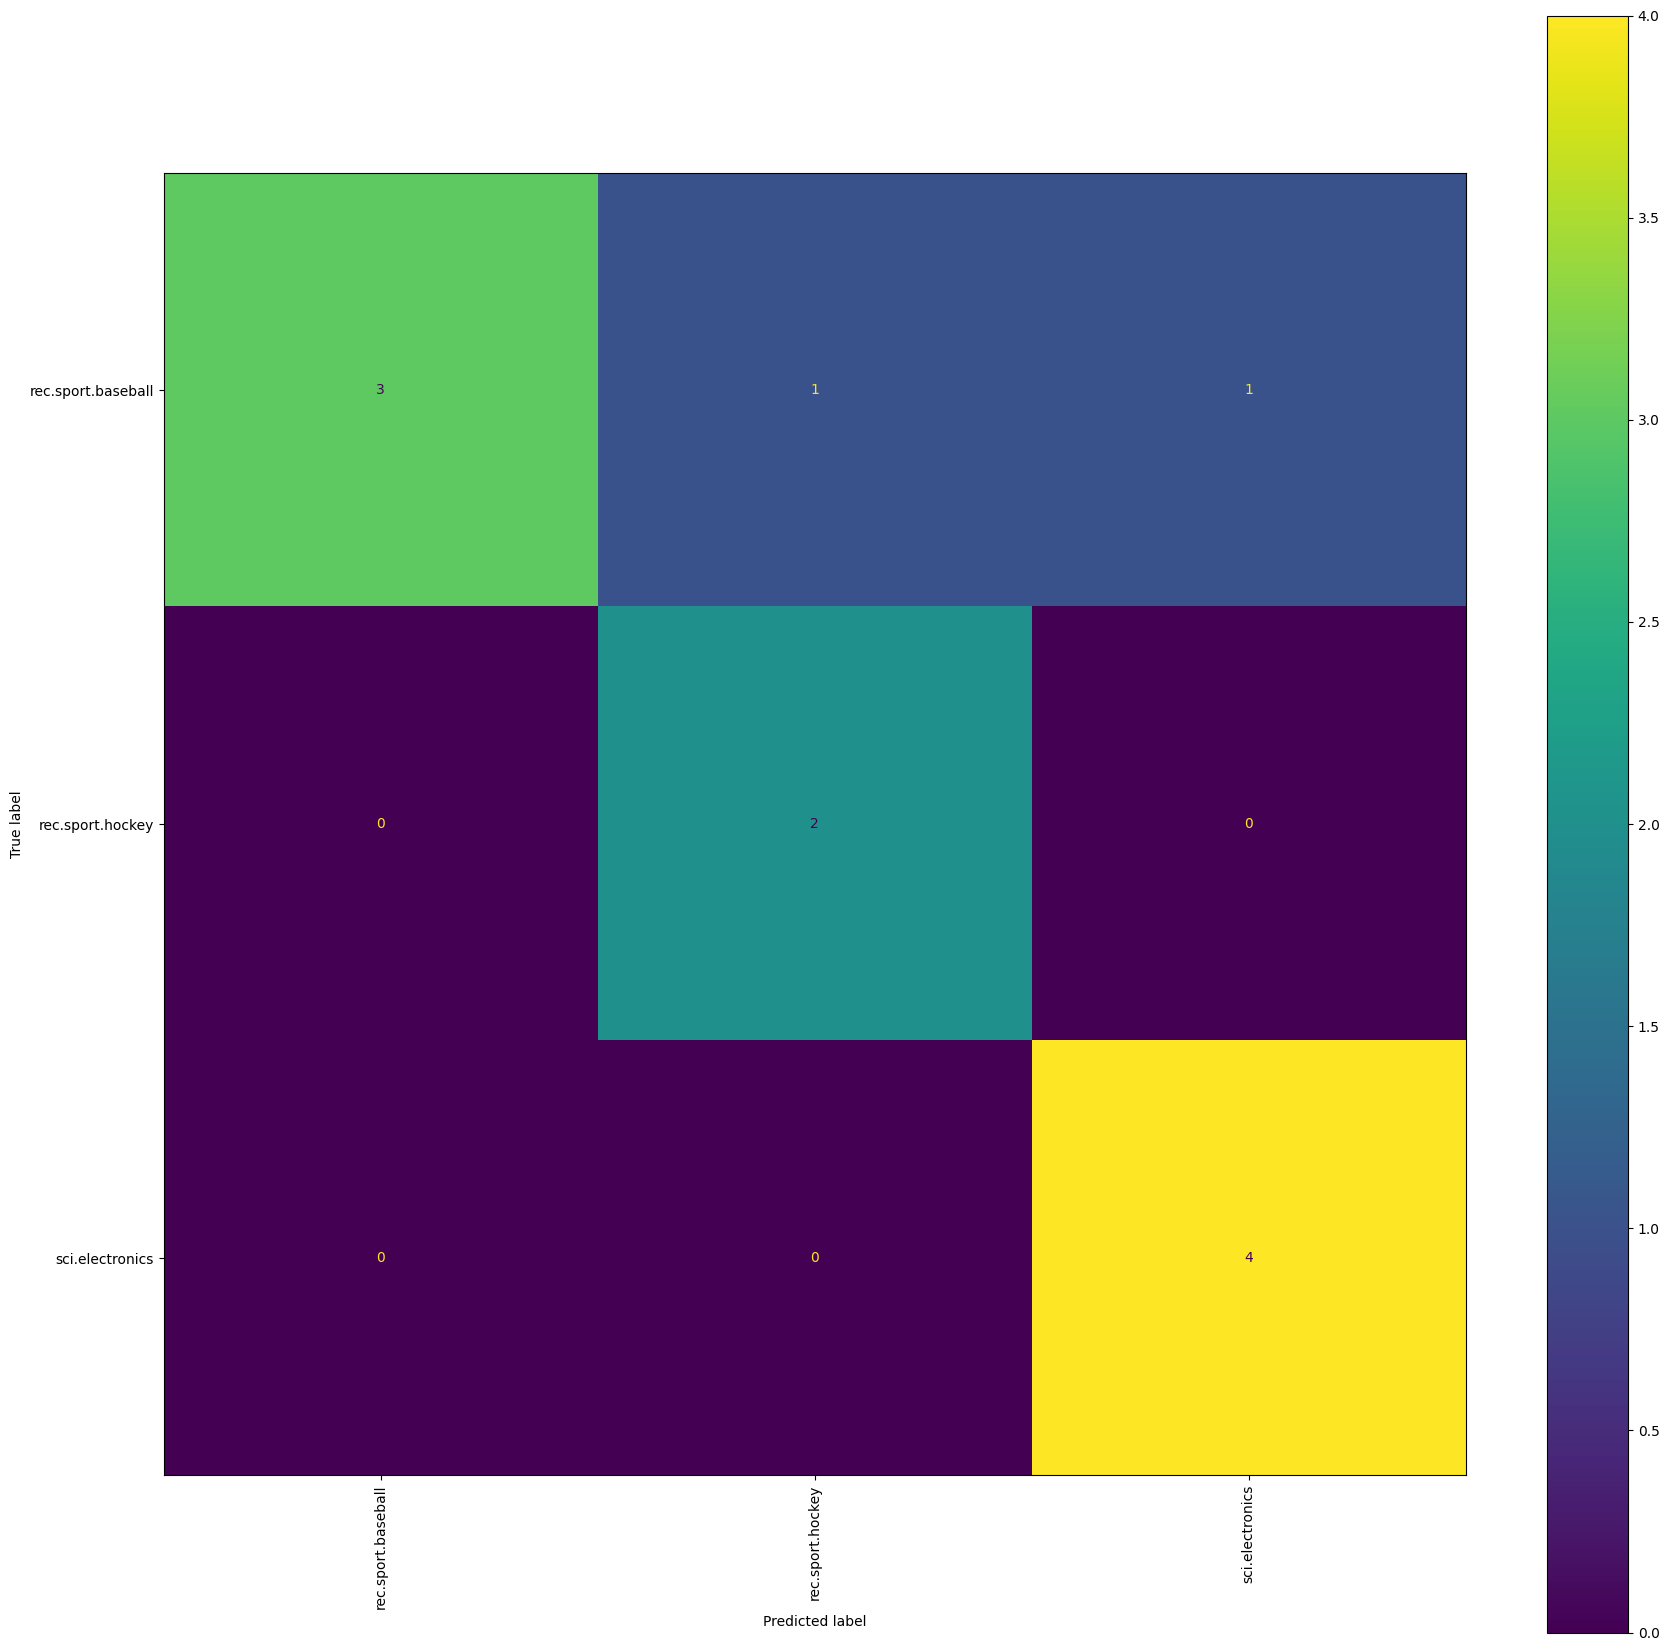

In [18]:
# Plot the confusion matrix of our results
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=ax)
plt.xticks(rotation=90)


In [19]:
pca = PCA(n_components=2)
pca.fit(embeddings)
pca_values = pca.transform(embeddings)


In [20]:
debug = False
if debug:
    for i in pca_values[:2]:
        print(i)

In [21]:
import pandas as pd
df_emb = pd.DataFrame(pca_values, columns=['x', 'y'])
df_emb['text'] = list_of_docs
df_emb['topic_category'] = df['topic_category'].values
df_emb.head()



,x,y,text,topic_category
0,-0.263234,-0.158916,Organization: University of Notre Dame - Offic...,rec.sport.hockey
1,-0.801696,0.114650,From: rauser@fraser.sfu.ca (Richard John Rause...,rec.sport.hockey
2,-0.446715,-0.130026,From: savoy@hg.uleth.ca (Jim Savoy)\r\nSubject...,rec.sport.baseball
3,-0.288510,0.303936,From: thf2@kimbark.uchicago.edu (Ted Frank)\r\...,rec.sport.baseball
4,1.835355,1.257831,From: wellison@kuhub.cc.ukans.edu\r\nSubject: ...,sci.electronics


In [22]:
# import plotly.express as px

# import plotly.offline as pyo
# pyo.init_notebook_mode(connected=True)


# # plotly.offline.init_notebook_mode(connected=True)

# px.scatter(df, x='x', y='y', hover_data=['text']);

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='x', ylabel='y'>

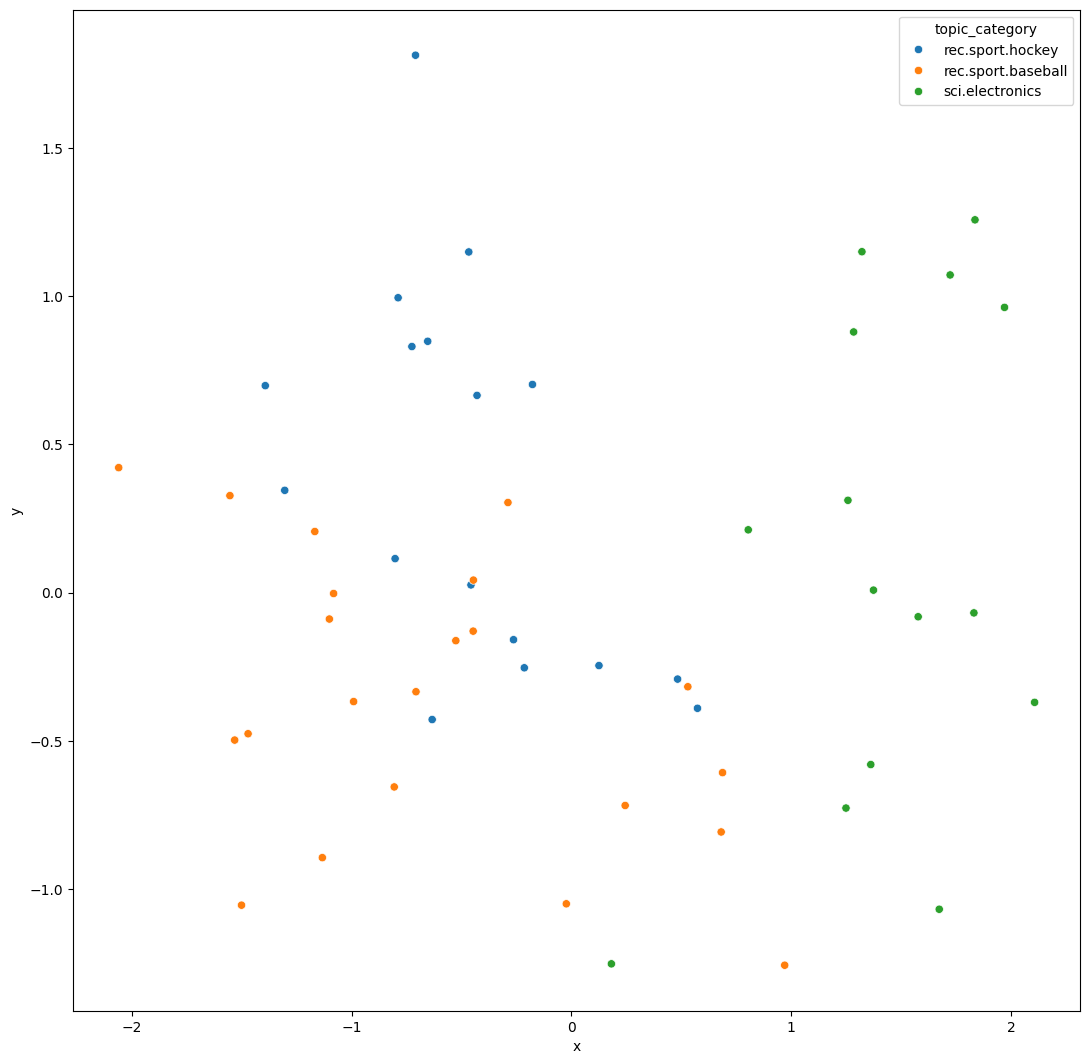

In [24]:
plt.figure(figsize=(13,13))

sns.scatterplot(data=df_emb, x='x', y='y', hue='topic_category')

In [ ]:
df.to_clipboard()